In [1]:
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

from datetime import date, datetime, timedelta

In [14]:
path_earning_call_presentation_all_sentiment=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_earning_call_presentation_all_sentiment.csv'
path_bond=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/bondfromwrds.csv'

In [3]:
data_call_presentation_all=pd.read_csv(path_earning_call_presentation_all_sentiment)
data_call_presentation_all['call_datetime']=\
pd.to_datetime(data_call_presentation_all['call_datetime'], format='%Y-%m-%d')
data_call_presentation_all=data_call_presentation_all.sort_values('call_datetime')

In [4]:
data_call_presentation_all['call_datetime'].min(),\
data_call_presentation_all['call_datetime'].max()

(Timestamp('2010-11-09 00:00:00'), Timestamp('2023-10-18 00:00:00'))

In [11]:
data_call_presentation_all=\
data_call_presentation_all[(data_call_presentation_all['call_datetime'] >= datetime(2010, 11, 9))&\
                           (data_call_presentation_all['call_datetime'] <= datetime(2023, 2, 28))].reset_index(drop=True)

In [15]:
bond=pd.read_csv(path_bond, low_memory=False)
# bond_tesla=bond[bond['permno_bondmonth']==93436]
# bond_tesla['date_bondmonth']=\
# pd.to_datetime(bond_tesla['date_bondmonth'], format='%Y-%m-%d')
# bond_tesla=bond_tesla.sort_values('date_bondmonth')
# bond_tesla=bond_tesla.reset_index(drop=True)

In [16]:
bond[bond['ISIN']=='US88160RAG65']

,DATE,ISSUE_ID,CUSIP,bond_sym_id,bsym,ISIN,company_symbol,BOND_TYPE,SECURITY_LEVEL,CONV,...,RET_LDM,RET_L5M,TMT,REMCOUPS,DURATION,DEFAULTED,DEFAULT_DATE,DEFAULT_TYPE,REINSTATED,REINSTATED_DATE


In [19]:
bond[bond['CUSIP']=='AO7577130']

,DATE,ISSUE_ID,CUSIP,bond_sym_id,bsym,ISIN,company_symbol,BOND_TYPE,SECURITY_LEVEL,CONV,...,RET_LDM,RET_L5M,TMT,REMCOUPS,DURATION,DEFAULTED,DEFAULT_DATE,DEFAULT_TYPE,REINSTATED,REINSTATED_DATE


In [24]:
bond[bond['company_symbol'] == 'TSLA']

,DATE,ISSUE_ID,CUSIP,bond_sym_id,bsym,ISIN,company_symbol,BOND_TYPE,SECURITY_LEVEL,CONV,...,RET_LDM,RET_L5M,TMT,REMCOUPS,DURATION,DEFAULTED,DEFAULT_DATE,DEFAULT_TYPE,REINSTATED,REINSTATED_DATE


In [18]:
bond.columns

Index(['DATE', 'ISSUE_ID', 'CUSIP', 'bond_sym_id', 'bsym', 'ISIN',
       'company_symbol', 'BOND_TYPE', 'SECURITY_LEVEL', 'CONV',
       'OFFERING_DATE', 'OFFERING_AMT', 'OFFERING_PRICE', 'PRINCIPAL_AMT',
       'MATURITY', 'TREASURY_MATURITY', 'COUPON', 'DAY_COUNT_BASIS',
       'DATED_DATE', 'FIRST_INTEREST_DATE', 'LAST_INTEREST_DATE', 'NCOUPS',
       'AMOUNT_OUTSTANDING', 'R_SP', 'R_MR', 'R_FR', 'N_SP', 'N_MR', 'N_FR',
       'RATING_NUM', 'RATING_CAT', 'RATING_CLASS', 'T_DATE', 'T_Volume',
       'T_DVolume', 'T_Spread', 'T_Yld_Pt', 'YIELD', 'PRICE_EOM', 'PRICE_LDM',
       'PRICE_L5M', 'GAP', 'COUPMONTH', 'nextcoup', 'COUPAMT', 'COUPACC',
       'MULTICOUPS', 'RET_EOM', 'RET_LDM', 'RET_L5M', 'TMT', 'REMCOUPS',
       'DURATION', 'DEFAULTED', 'DEFAULT_DATE', 'DEFAULT_TYPE', 'REINSTATED',
       'REINSTATED_DATE'],
      dtype='object')

In [11]:
bond['ISIN'][0]

'US000361AB18'

In [13]:
len(bond['cusip_bondmonth'].unique()), len(bond['ISIN'].unique())

(113671, 113511)

In [60]:
crsp_tesla=\
crsp_tesla[(crsp_tesla['date_crspmonth'] >= datetime(2010, 11, 9))&\
           (crsp_tesla['date_crspmonth'] <= datetime(2023, 2, 28))].reset_index(drop=True)

In [61]:
crsp_tesla.columns

Index(['permno_crspmonth', 'date_crspmonth', 'shrcd_crspmonth',
       'ncusip_crspmonth', 'ticker_crspmonth', 'COMNAM', 'permco_crspmonth',
       'hexcd_crspmonth', 'cusip_crspmonth', 'prc_crspmonth', 'vol_crspmonth',
       'ret_crspmonth', 'dlret_crspmonth', 'bid_crspmonth', 'ask_crspmonth',
       'shrout_crspmonth'],
      dtype='object')

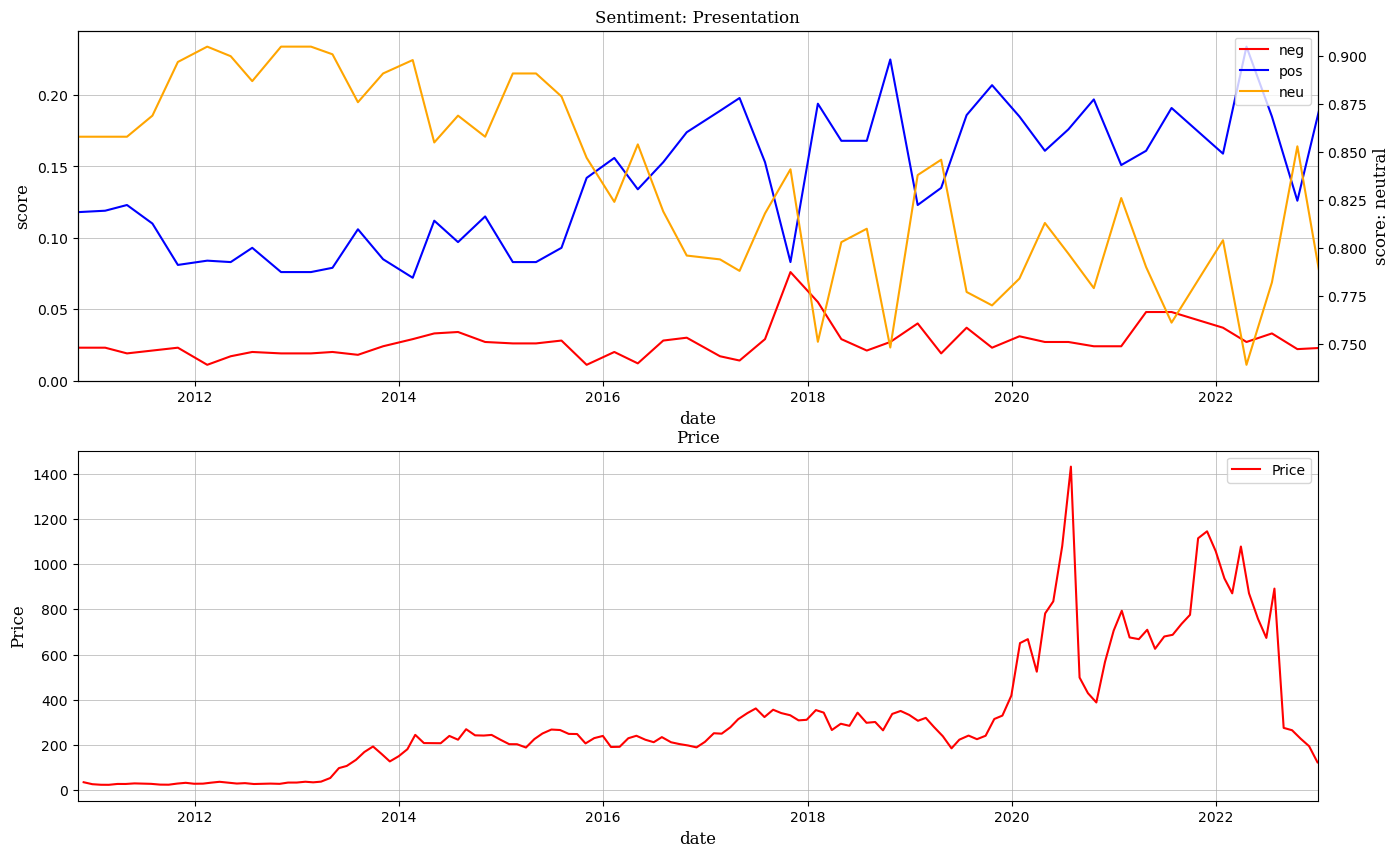

In [91]:
csfont = {'fontname':'serif'}
sizetext=12

fig, ([ax1, ax2]) = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 10))

lns1=\
ax1.plot(data_call_presentation_all['call_datetime'],\
         data_call_presentation_all['presentationa_neg'], label='neg', color='r')
lns2=\
ax1.plot(data_call_presentation_all['call_datetime'],\
         data_call_presentation_all['presentationa_pos'], label='pos', color='b')

ax1.set_title("Sentiment: Presentation", **csfont, size = sizetext)
ax1.set_ylabel('score', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax1.grid(linewidth=0.5)
ax1.legend()

ax11 = ax1.twinx()
lns3=ax11.plot(data_call_presentation_all['call_datetime'],\
               data_call_presentation_all['presentationa_neu'], label='neu', color='orange')
ax11.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)

ax2.plot(crsp_tesla['date_crspmonth'],\
         crsp_tesla['prc_crspmonth'], label='Price', color='r')

ax2.set_title("Price", **csfont, size = sizetext)
ax2.set_ylabel('Price', size = sizetext, **csfont)
ax2.set_xlabel('date', size = sizetext, **csfont)
ax2.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax2.grid(linewidth=0.5)
ax2.legend()

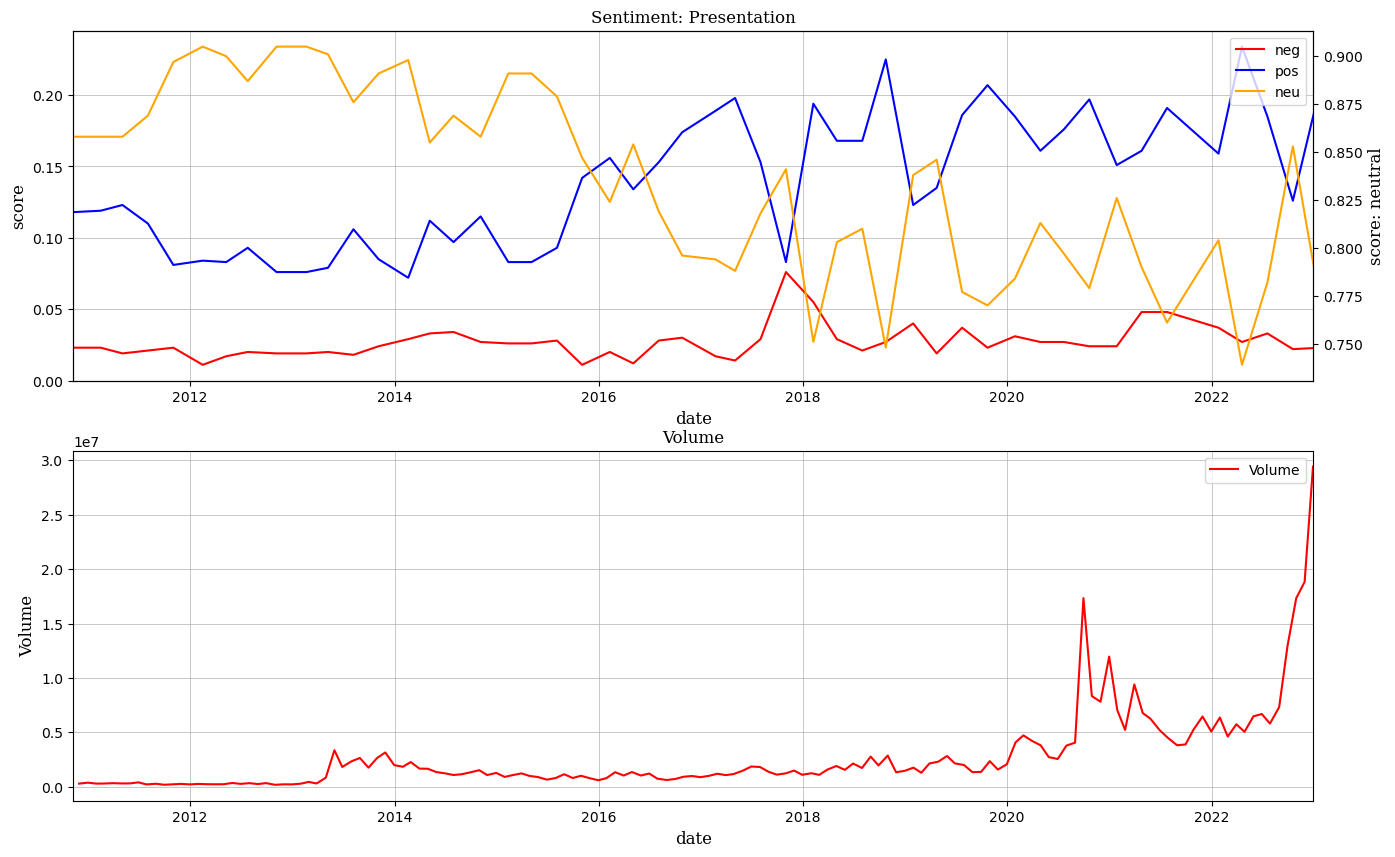

In [90]:
csfont = {'fontname':'serif'}
sizetext=12

fig, ([ax1, ax2]) = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 10))

lns1=\
ax1.plot(data_call_presentation_all['call_datetime'],\
         data_call_presentation_all['presentationa_neg'], label='neg', color='r')
lns2=\
ax1.plot(data_call_presentation_all['call_datetime'],\
         data_call_presentation_all['presentationa_pos'], label='pos', color='b')

ax1.set_title("Sentiment: Presentation", **csfont, size = sizetext)
ax1.set_ylabel('score', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax1.grid(linewidth=0.5)
ax1.legend()

ax11 = ax1.twinx()
lns3=ax11.plot(data_call_presentation_all['call_datetime'],\
               data_call_presentation_all['presentationa_neu'], label='neu', color='orange')
ax11.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)

ax2.plot(crsp_tesla['date_crspmonth'],\
         crsp_tesla['vol_crspmonth'], label='Volume', color='r')

ax2.set_title("Volume", **csfont, size = sizetext)
ax2.set_ylabel('Volume', size = sizetext, **csfont)
ax2.set_xlabel('date', size = sizetext, **csfont)
ax2.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax2.grid(linewidth=0.5)
ax2.legend()

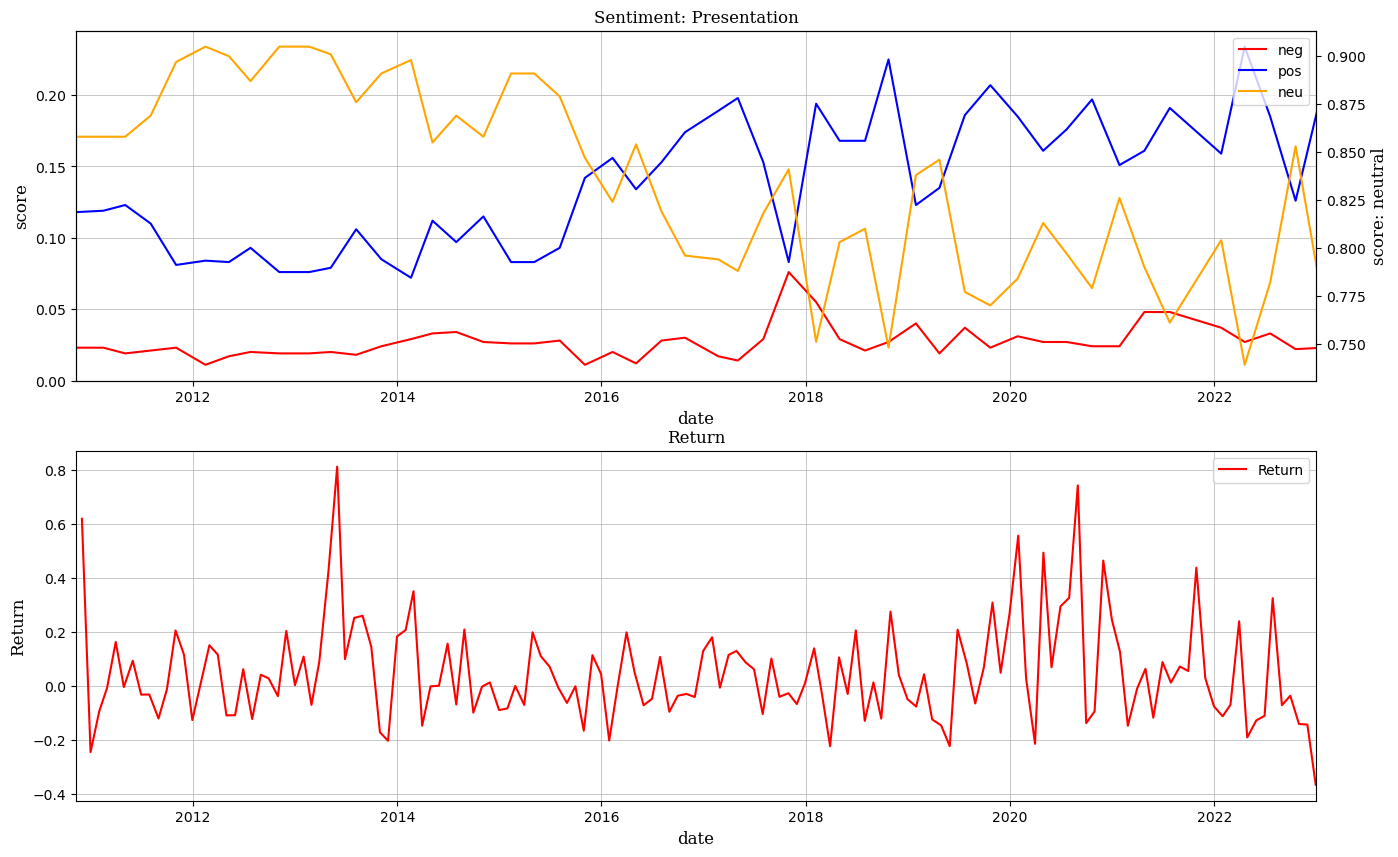

In [89]:
csfont = {'fontname':'serif'}
sizetext=12

fig, ([ax1, ax2]) = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 10))

lns1=\
ax1.plot(data_call_presentation_all['call_datetime'],\
         data_call_presentation_all['presentationa_neg'], label='neg', color='r')
lns2=\
ax1.plot(data_call_presentation_all['call_datetime'],\
         data_call_presentation_all['presentationa_pos'], label='pos', color='b')

ax1.set_title("Sentiment: Presentation", **csfont, size = sizetext)
ax1.set_ylabel('score', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax1.grid(linewidth=0.5)
ax1.legend()

ax11 = ax1.twinx()
lns3=ax11.plot(data_call_presentation_all['call_datetime'],\
               data_call_presentation_all['presentationa_neu'], label='neu', color='orange')
ax11.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)

ax2.plot(crsp_tesla['date_crspmonth'],\
         crsp_tesla['ret_crspmonth'].apply(lambda x: float(x)), label='Return', color='r')

ax2.set_title("Return", **csfont, size = sizetext)
ax2.set_ylabel('Return', size = sizetext, **csfont)
ax2.set_xlabel('date', size = sizetext, **csfont)
ax2.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)])
ax2.grid(linewidth=0.5)
ax2.legend()

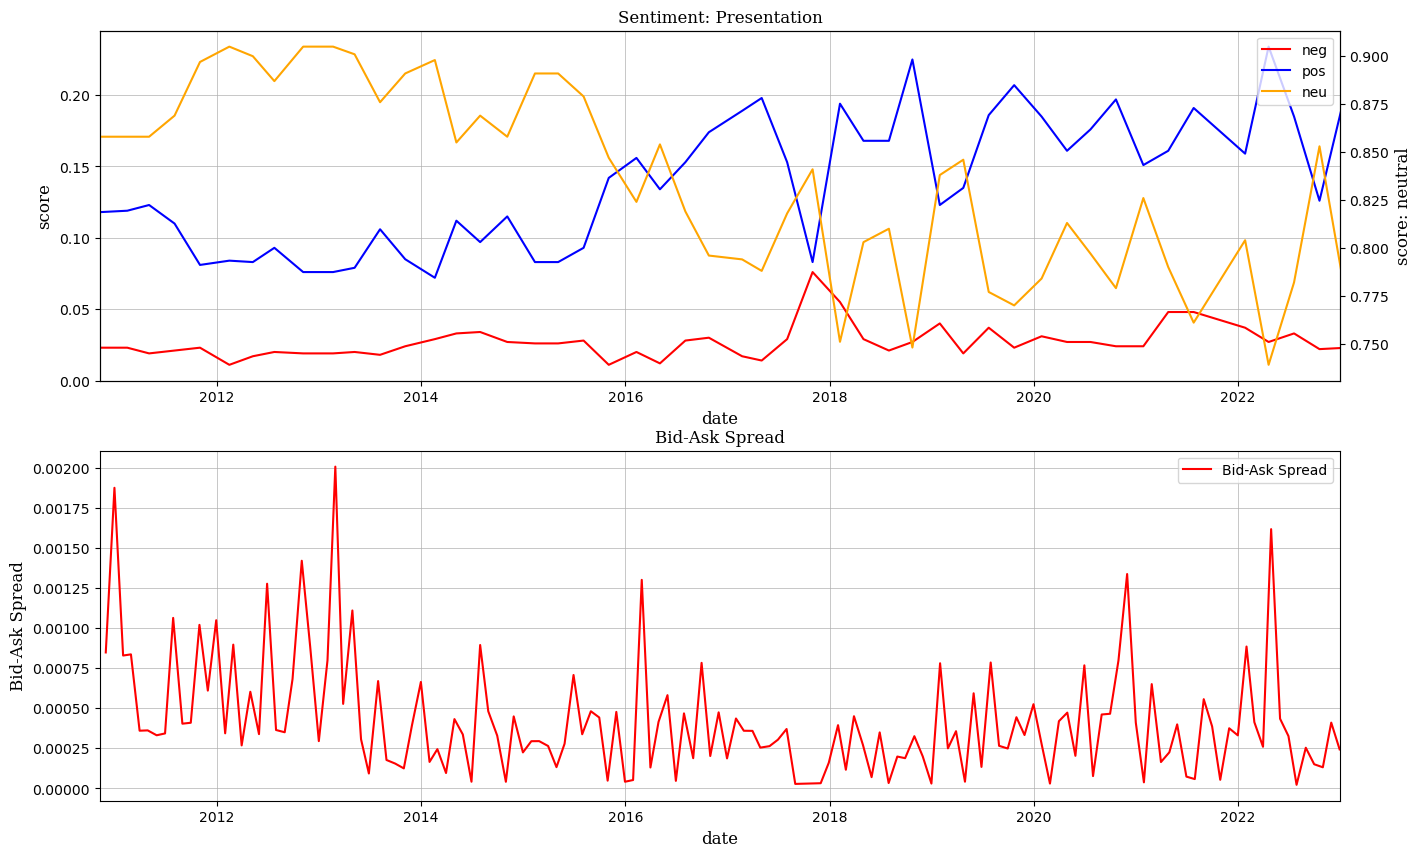

In [88]:
csfont = {'fontname':'serif'}
sizetext=12

fig, ([ax1, ax2]) = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 10))

lns1=\
ax1.plot(data_call_presentation_all['call_datetime'],\
         data_call_presentation_all['presentationa_neg'], label='neg', color='r')
lns2=\
ax1.plot(data_call_presentation_all['call_datetime'],\
         data_call_presentation_all['presentationa_pos'], label='pos', color='b')

ax1.set_title("Sentiment: Presentation", **csfont, size = sizetext)
ax1.set_ylabel('score', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax1.grid(linewidth=0.5)
ax1.legend()

ax11 = ax1.twinx()
lns3=ax11.plot(data_call_presentation_all['call_datetime'],\
               data_call_presentation_all['presentationa_neu'], label='neu', color='orange')
ax11.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)

ax2.plot(crsp_tesla['date_crspmonth'],\
         crsp_tesla['spread_crspmonth'], label='Bid-Ask Spread', color='r')

ax2.set_title("Bid-Ask Spread", **csfont, size = sizetext)
ax2.set_ylabel('Bid-Ask Spread', size = sizetext, **csfont)
ax2.set_xlabel('date', size = sizetext, **csfont)
ax2.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax2.grid(linewidth=0.5)
ax2.legend()